# Xinghuan_Pdfplumber_Coding_Sample(2)

In this coding sample, I try to get the text after each bullet point in the page 20 of the paper "Weisbuch_2005_Persuation_dynamics.pdf". 

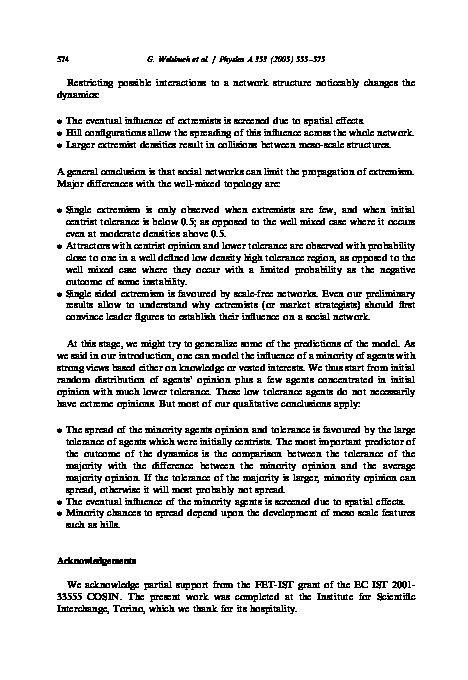

In [76]:
# I imported necessary package here
import pdfplumber 
import pandas as pd 
import os


path_practice = os.path.join(os.getcwd(), 'Weisbuch_2005_Persuation_dynamics.pdf')
pdf_prac = pdfplumber.open(path_practice)
p20 = pdf_prac.pages[19]
p20_text = p20.extract_text()
im = p20.to_image()
im # Below picture is the page 20 of the paper. 

In [77]:
p20_text # Below paragraph of text is the text in page 20. There are 9 bullet points totally. 
         #As we can see, each bullet point starts with \n(cid:1) and ends with .\n

'ARTICLE IN PRESS\n574 G.Weisbuchetal./PhysicaA353(2005)555–575\nRestricting possible interactions to a network structure noticeably changes the\ndynamics:\n(cid:1) The eventual inﬂuence of extremists is screened due to spatial effects.\n(cid:1) Hillconﬁgurationsallowthespreadingofthisinﬂuenceacrossthewholenetwork.\n(cid:1) Larger extremist densities result in collisions between meso-scale structures.\nAgeneralconclusionisthatsocialnetworkscanlimitthepropagationofextremism.\nMajor differences with the well-mixed topology are:\n(cid:1) Single extremism is only observed when extremists are few, and when initial\ncentrist tolerance is below 0.5; as opposed to the well mixed case where it occurs\neven at moderate densities above 0.5.\n(cid:1) Attractorswithcentristopinionandlowertoleranceareobservedwithprobability\nclose tooneinawelldeﬁnedlowdensityhightoleranceregion,asopposedtothe\nwell mixed case where they occur with a limited probability as the negative\noutcome of some instability.\n

In [78]:
# I will use begin and end as the parser to get the text I wanted and save them to df_bullet dataframe. 
begin = '\n(cid:1)'
end = '.\n'
output = []
column_names = ['page', 'text after bullet point']
df_bullet = pd.DataFrame(columns = column_names)


def find_between( s, first, last ):
    """This function is used to find the text between the begin and the end of each bullet point. 
       In this page, there are 3 groups of bullet points. This function can only find the first group. 
       I need to use the second function to loop over this page to find the rest of them. """
    s_backup = s[s.find(first): ]
    try: 
        while s_backup[s_backup.find(last) + len(last)] == '(': # This line is to check if the "begin" ends with "(". 
            s_backup = s_backup[s_backup.find(last) + len(last): ] 
        correct = last + s_backup[s_backup.find(last) + len(last)] # Correct means the last character of each group of bullet points. 
        adding_element = s[s.find(first): s.find(correct)].strip(begin)
        # After fixing the begning and the end of each group of bullet points, I get the text between them and get rid of the unnecessary characters. 
        element_list = adding_element.split('\n(cid:1) ')
        element_list = [element.replace('\n', ' ') for element in element_list]
        for element in element_list:
            if element not in output: 
                output.append(element)
        return s[s.find(first): s.find(correct) + len(correct) - 1]  
    except IndexError: 
        pass
    
def loop_page(page, first, last, page_num): 
    """I use this function to loop the first function in whole page and save the result to df_bullet dataframe."""
    page_bc = page
    while type(find_between(page_bc, first, last)) != type(None): 
        page_bc = page_bc.replace(find_between(page_bc, first, last), '')
    df_output = pd.DataFrame(columns = column_names)
    df_output['text after bullet point'] = output
    df_output['page'] = page_num
    global df_bullet
    df_bullet = df_bullet.append(df_output, ignore_index = True)

loop_page(p20_text,begin, end, 20)
df_bullet

,page,text after bullet point
0,20,The eventual inﬂuence of extremists is screen...
1,20,Hillconﬁgurationsallowthespreadingofthisinﬂuen...
2,20,Larger extremist densities result in collision...
3,20,Single extremism is only observed when extrem...
4,20,Attractorswithcentristopinionandlowertolerance...
5,20,Single sided extremism is favoured by scale-fr...
6,20,The spread of the minority agents opinion and...
7,20,The eventual inﬂuence of the minority agents i...
8,20,Minority chances to spread depend upon the dev...
